#### ***Pratyush Kumar***
##### *N052*
##### *MBA Tech CE (div. D)*

## EXPERIMENT 7 - Task 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

•	Upload data set into the dataframe

In [ ]:
df= pd.read_csv("adultPrac7.csv")

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


•	Check the shape of the data set.

In [ ]:
df.shape

(32561, 15)

•	Find out all the categorical columns from the data set

In [ ]:
# Printing all columns
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
# selecting categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# Printing only categorical columns
cat_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

•	Check if null values exist in all the categorical columns

In [ ]:
df[cat_cols].isna().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

•	Identify the problems with “workclass”, “Occupation”,”native_country” columns and rectify it.

In [ ]:
# finding unique values in each column
for val in cat_cols:
  print('Unique values in ',val,':','\n',df[val].unique())
  print()

Unique values in  workclass : 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values in  education : 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values in  marital_status : 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique values in  occupation : 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

Unique values in  relationship : 
 [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Unique values in  race : 
 [' White' ' Black' ' A

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [ ]:
# Replace '?' with null in categorical columns
for val in cat_cols:
    df[val] = df[val].replace(' ?', pd.NA)

In [ ]:
# Check for null values in categorical columns
df[cat_cols].isna().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [ ]:
# Replace all null values with the mode of the respective column
for col in cat_cols:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df[cat_cols].isna().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

•	Explore numeric columns and check any null values exist for the numeric columns.

In [ ]:
# selecting all numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
# Printing only categorical columns
num_cols

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [ ]:
# Check if null values exist in all the numeric columns
df[num_cols].isna().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [ ]:
# finding unique values in each column
for val in num_cols:
  print('Unique values in ',val,':','\n',df[val].unique())
  print()

Unique values in  age : 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values in  fnlwgt : 
 [ 77516  83311 215646 ...  34066  84661 257302]

Unique values in  education_num : 
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values in  capital_gain : 
 [ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 4

•	Create a feature vector with x= all the columns except income and y=income

In [ ]:
# Selecting all columns except 'income' as features
X=df.loc[:,df.columns!='income']

# Selecting 'income' as target variable
Y=df[['income']]

In [ ]:
print(X.columns,'\n',Y.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object') 
 Index(['income'], dtype='object')


In [ ]:
Y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [ ]:
# Converting target variable Y into binary values by replacing '>50K' with 1 and '<=50K' with 0
# because roc_curve and roc_auc_score functions require binary values (0, 1) or (-1, 1)
Y = Y.replace({' >50K': 1, ' <=50K': 0})

In [ ]:
Y.head()

,income
0,0
1,0
2,0
3,0
4,0


In [ ]:
Y.dtypes

income    int64
dtype: object

o	Apply one hot encoding on all the categorical columns

In [ ]:
X_cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# One-hot encoding on all categorical columns in the X dataset
X = pd.get_dummies(X, columns=X_cat_cols)

In [ ]:
X.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       ...
       'native_country_ Portugal', 'native_country_ Puerto-Rico',
       'native_country_ Scotland', 'native_country_ South',
       'native_country_ Taiwan', 'native_country_ Thailand',
       'native_country_ Trinadad&Tobago', 'native_country_ United-States',
       'native_country_ Vietnam', 'native_country_ Yugoslavia'],
      dtype='object', length=105)

•	Implement feature engineering for the train, test split data set:
  

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # 0.2 42 or 0.33 125

In [ ]:
print("cols in training set:", X.shape[1])
print("cols in test set:", X_test.shape[1])

cols in training set: 105
cols in test set: 105


o	Check the data types of columns of the input features of training data set

In [ ]:
X_train.dtypes

age                                int64
fnlwgt                             int64
education_num                      int64
capital_gain                       int64
capital_loss                       int64
                                   ...  
native_country_ Thailand           uint8
native_country_ Trinadad&Tobago    uint8
native_country_ United-States      uint8
native_country_ Vietnam            uint8
native_country_ Yugoslavia         uint8
Length: 105, dtype: object

o	Identify categorical columns that has null values and fill them with most probable value in the data set

In [ ]:
X_train.isna().sum()

age                                0
fnlwgt                             0
education_num                      0
capital_gain                       0
capital_loss                       0
                                  ..
native_country_ Thailand           0
native_country_ Trinadad&Tobago    0
native_country_ United-States      0
native_country_ Vietnam            0
native_country_ Yugoslavia         0
Length: 105, dtype: int64

In [ ]:
# finding unique values in each column
for val in X_train:
  print('Unique values in ',val,':','\n',X_train[val].unique())
  print()

Unique values in  age : 
 [33 36 58 21 27 44 62 20 24 43 41 40 30 38 25 26 37 19 32 55 28 34 39 42
 49 54 35 29 61 47 23 56 71 53 17 46 52 51 50 45 48 22 81 18 80 65 31 76
 77 60 59 69 66 57 63 70 72 90 64 68 78 67 83 73 74 75 79 84 88 82 87 85
 86]

Unique values in  fnlwgt : 
 [198183  86459 203039 ... 359461 216284  54261]

Unique values in  education_num : 
 [13 11  5 10  6  9 15 12  7  8 14  4 16  3  2  1]

Unique values in  capital_gain : 
 [    0  5178 27828  3103 15024  5013  2176 99999  4865  4416  1797  7688
  2907  4064  7298  2885  3942  2346  2964  2635  1086 20051  3411  2228
 10520  1151  3908  1055  3325 14084  4787  2407  4386   114 41310  1506
 18481 13550  3137  6514  2174  4101  2597  3781  8614  3674 25124 11678
  2829  2354  5721 14344  5556  9386  2580  3471  2009  6418  1409   914
  7443  3464  5060 15831  6849  5455 34095  1424  2202   594 25236  6767
  4650  2050 10605  7430  2463  1471 10566  4687  2105  6097  2653  3818
 22040  1831  2036  4508  2387  2062  

Inference: No null or miscoded values found since they were already handled in the original dataset, before separating input and output features.

o	Repeat above step for the input features of test data set

In [ ]:
# Check the data types of columns of the input features of testing data set
X_test.dtypes

age                                int64
fnlwgt                             int64
education_num                      int64
capital_gain                       int64
capital_loss                       int64
                                   ...  
native_country_ Thailand           uint8
native_country_ Trinadad&Tobago    uint8
native_country_ United-States      uint8
native_country_ Vietnam            uint8
native_country_ Yugoslavia         uint8
Length: 105, dtype: object

In [ ]:
# Identify categorical columns that has null values and fill them with most probable value in the data set
X_test.isna().sum()

age                                0
fnlwgt                             0
education_num                      0
capital_gain                       0
capital_loss                       0
                                  ..
native_country_ Thailand           0
native_country_ Trinadad&Tobago    0
native_country_ United-States      0
native_country_ Vietnam            0
native_country_ Yugoslavia         0
Length: 105, dtype: int64

In [ ]:
# finding unique values in each column
for val in X_test:
  print('Unique values in ',val,':','\n',X_test[val].unique())
  print()

Unique values in  age : 
 [27 45 29 30 51 58 22 50 43 37 41 46 33 52 38 32 40 31 23 59 18 53 26 28
 34 25 54 48 72 20 64 60 19 62 49 81 47 36 24 39 63 35 42 55 68 90 57 21
 17 69 56 44 66 70 67 73 61 78 65 79 80 74 83 84 71 85 75 82 77 76]

Unique values in  fnlwgt : 
 [160178  50567 185908 ... 354148  43652  25837]

Unique values in  education_num : 
 [10  9 13 14 12  4  7 11 15  5  3  6 16  8  2  1]

Unique values in  capital_gain : 
 [    0  2202 15024  3103  7688  5178 99999  3325  2885  3464 14344  7298
  2174   991 14084  4064  3942  2050 27828  8614  4650  5013  7978   594
  3471  1506  6849   114  3411  6418  4787  2936  2354  5455  4101  2105
  4386  4508  6723 10605  1831  3908  1173  4416 13550  1471  9386  2635
  2414  2290  3432  3273  2829  2176 10520  2580  3137  2407  4934  6360
  2993  1797  1055  9562  3674  4865  2463  3781  6767  2036  2907  2597
  1086  1409  2964  2977 34095 15831  7896 15020 20051  2653  1111   401
  6497  1848  4687  7430  2329]

Unique values i

o	Apply feature scaling using robust scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Fitting the scaler to training data
X_train = scaler.fit_transform(X_train)
# Transforming the test date using the scaler
#X_train = scaler.transform(X_train_scaled)

# Fitting the scaler to training data
#X_test = scaler.fit_transform(X_test)
# Transforming the test data using the scaler
X_test = scaler.transform(X_test)

## EXPERIMENT 7 - Task 3

Task 3: Implement Naïve Bayes on the given data set.

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Creating an instance of the Gaussian Naive Bayes classifier
model = GaussianNB()

# Training the model using the training data
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
# Predicting the output
predicted = model.predict(X_test)

## EXPERIMENT 7 - Task 4

Task 4: Print confusion matrix

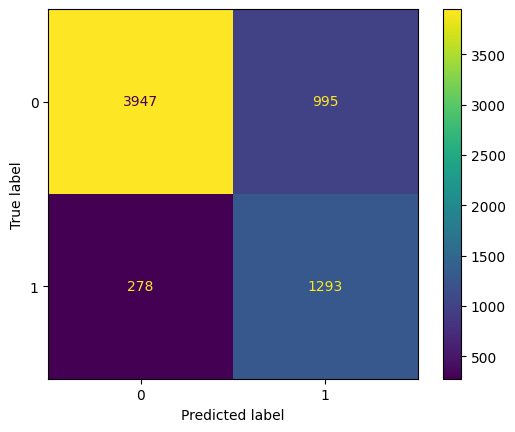

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

# Computing confusion matrix
labels = [0,1]
cm = confusion_matrix(y_test, predicted)
#print(cm)

# Plotting confusion matrix
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
display_cm.plot();

## EXPERIMENT 7 - Task 5

Task 5: Check accuracy score of the classifier.

In [ ]:
# Evaluating the accuracy of the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

Accuracy: 0.804544756640565


In [ ]:
# Model evaluation
f1 = f1_score(predicted, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.804544756640565
F1 Score: 0.794030819171466


## EXPERIMENT 7 - Task 6

Task 6: Print classification report using sklearn.metrics

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      4942
           1       0.57      0.82      0.67      1571

    accuracy                           0.80      6513
   macro avg       0.75      0.81      0.77      6513
weighted avg       0.85      0.80      0.82      6513



## EXPERIMENT 7 - Task 7

Task 7: Draw ROC curve for the model.

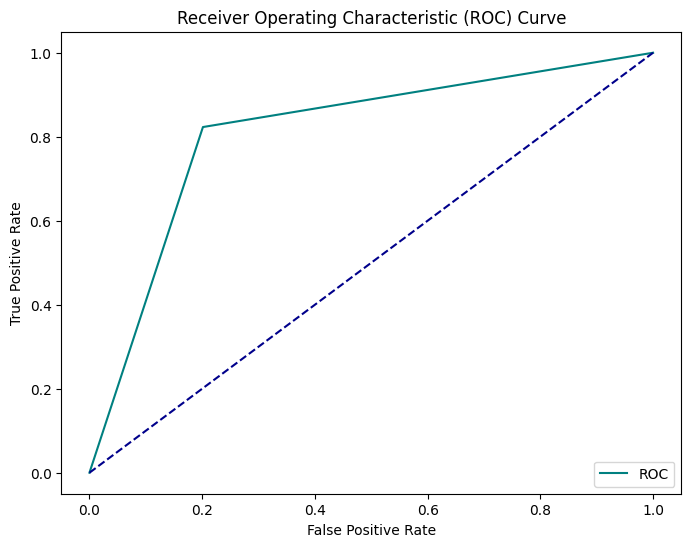

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, predicted)
auc=roc_auc_score(y_test, predicted)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='teal', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(auc)

0.810853578145572
